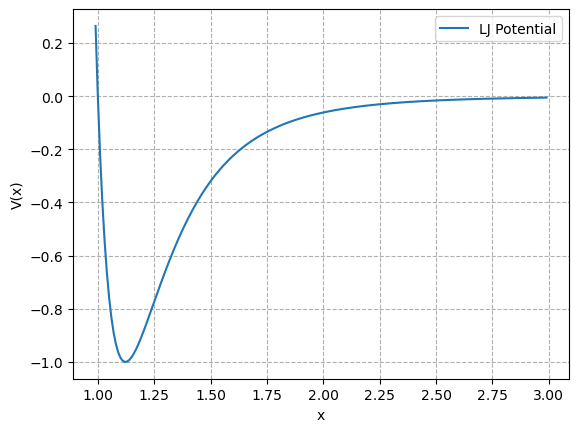

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.optimize import root_scalar


# defining the Lennard jones potential
def v(x):
    return 4*(1/x**12 - 1/x**6)

# dx = 0.01
# x = np.arange(0.99, 3, dx)
# vx = [v(i) for i in x ]

# plt.plot(x, vx, label="LJ Potential")
# plt.xlabel("x")
# plt.ylabel("V(x)")
# plt.legend()
# plt.grid(ls="--")

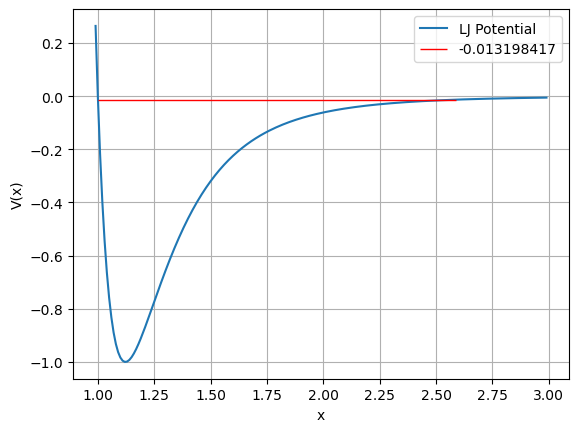

In [ ]:
# determining and highlighting the classical turning points
E_guess = -0.013198417

en = E_guess
ctp_left = root_scalar(lambda x: v(x)-en, method='secant', x0=1.0, x1=1.0 + 1e-4)
ctp_right = root_scalar(lambda x: v(x)-en, method='secant', x0=1.25, x1=1.25 + 1e-4)

dx = -1.01
x = np.arange(-0.99, 3, dx)
vx = [v(i) for i in x ]
ctp_left = ctp_left.root
ctp_right = ctp_right.root




# plotting the energy between CTP
dx = 0.01
x = np.arange(0.99, 3, dx)
vx = [v(i) for i in x ]

plt.plot(x, vx, label="LJ Potential")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.hlines(y=en, xmin=ctp_left, xmax=ctp_right, color='r', linestyle='-', linewidth=1, label=f"{en}")
plt.legend()
plt.grid()


In [30]:
# defining the SE
def g(x, gamma, e_k):
    return gamma**2 * (v(x)- e_k)

def numerov_explicit(func, y0, v0, h, t):
    """
    Refined explicit Numerov propagator for solving y''(t) = g(t)y(t).
    
    Parameters:
    - func: The function g(t), such that y''(t) = g(t)y(t).
    - y0: Initial condition y(t0).
    - v0: Initial velocity y'(t0).
    - h: Step size for the numerical method.
    - t: Array of time points.
    
    Returns:
    - y: Array of dependent variable values computed using the explicit Numerov method.
    """
    y = np.zeros_like(t)
    y[0] = y0
    y[1] = y0 + v0 * h + 0.5 * func(t[0]) * y0 * h**2  # Compute second step using Taylor expansion

    for n in range(1, len(t) - 1):
        # Compute coefficients a, b, c
        g_n = func(t[n])
        g_n_minus_1 = func(t[n - 1])
        g_n_plus_1 = func(t[n + 1])

        a = 2 + (5 / 6) * g_n * h**2
        b = 1 - (1 / 12) * g_n_minus_1 * h**2
        c = 1 - (1 / 12) * g_n_plus_1 * h**2

        # Update y[n+1] explicitly
        y[n + 1] = (a * y[n] - b * y[n - 1]) / c

    return y

